## Introduction

Given the growing theoretical and practical concern in discussing corporate socio-political positioning in controversial issues (i.e., CSA) ranging from climate change to gun control and LGBTQ rights, this work aims to track users' engagement and sentiments over time and also test classification algorithms for CSA problems.

Although sentiment analysis is a known problem in machine learning, no previous effort has been made in recurrent literature to classify users' sentiments in the CSA context.

Thus, in this first experiment, I seek to understand whether a company standing on controversial social issues generates mostly **positive, neutral, or negative sentiments**. For achieving my goal, I chose to use Disney as a case study.

This choice is based on a recent event where a teaser from Little Mermaid live-action remake was recently released and caused a lot of online content. The reason for such an online movement was Disney's choice of Ariel (the main character) being interpreted by a black actress. Although the company didn't state clearly their positioning on anti-racism, inclusion, or representation, it's clear that Disney is trying to send a message and, just like a statement, is subject to retaliation once the animated character is widely known as a white girl with red hair and green eyes. I chose this case mainly because it is a firm's positioning (although indirectly) that can harm its image and profits.

## Extracting tweets

The first step is obtaining my dataset. For this, I used SNScrape library to scrape tweets from January 2019 to September 2022. I chose this period of time because Halle Bailey (the actress that plays Ariel) was chosen for the role in 2019 and the first teaser was in September 2022 (when the public mostly engaged on social media to support or not Disney's choice).

My initial intentions are: (1) to map whether there were more negative feelings than positive feelings during this period; and (2) compare feelings between the months with corporate positioning (January 2019 and September 2022) and those without corporate positioning.

### Defining my query of search

To filter the tweets that were directed at the company on the subject, I used the keyword "little mermaid" when mentioning the company in question (@Disney). Also, only tweets in English were used and in the period of time previously justified.

I also include replies, retweets, and likes for future analysis of engagement that will probably fall outside the scope of the discipline.

In [266]:
#query = "little mermaid" "(@Disney) lang:en until:2022-09-30 since:2019-01-01"

#tweets = []
#limit = 10000

#for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
   # print(vars(tweet))
    #break
    #if len(tweets) == limit:
        #break
    #else:
        #tweets.append([tweet.date, tweet.id, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount])
        
#df = pd.DataFrame(tweets, columns=['date', 'user_id', 'text', 'replies', 'retweets', 'likes'])
#print(df)

7558 tweets were scrapped in this phase and saved as a CSV file.

All tweets were manually classified as positive, neutral, or negative according to users' sentiments toward the company. 

The table below indicates examples of classification using tweets' text.

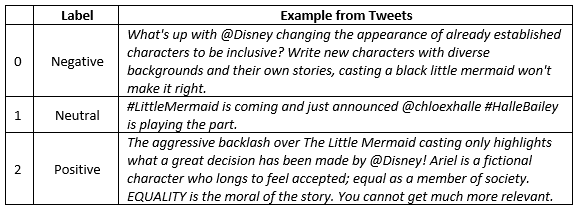

## Exploratory Data Analysis

This section is dedicated to exploring the database mainly in relation to the initial goals. That is:

*  Map whether there were more negative feelings than positive feelings during this period; and
*  Compare feelings between the months with corporate positioning (January 2019 and September 2022) and those without corporate positioning.





In [267]:
import pandas as pd
import numpy as np
import re #for regular expressions
import nltk
import string
import warnings
import numpy as np

In [268]:
url = 'https://raw.githubusercontent.com/nathaliasbm/ML-Project/main/data/exp1.csv'
dataset = pd.read_csv(url, encoding='unicode_escape')
dataset.head()

,date,user_id,text,sentiment,replies,retweets,likes
0,2022-09-29 22:32:31+00:00,1.575615e+18,Celebrities Have HUGE MELTDOWN After WOKE Litt...,negative,0,0,1
1,2022-09-29 16:30:41+00:00,1.575523e+18,"Hey @Disney, is it too late to add a scene to ...",neutral,0,0,3
2,2022-09-29 13:39:33+00:00,1.575480e+18,@rachelzegler Who is doing the casting work at...,negative,0,0,0
3,2022-09-29 13:11:28+00:00,1.575473e+18,My gf keeps bullying me because I thought Ursu...,neutral,4,0,1
4,2022-09-29 10:53:55+00:00,1.575439e+18,Um @Disney why not make a movie about Gabriell...,neutral,0,0,0


In [269]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,7558,7540,2019-08-09 15:20:00+00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,7558.0,NaN,NaN,NaN,1266442397528765696.0,165853084907976000.0,1079928692829200000.0,1146907807318499968.0,1161430199046550016.0,1397483051395999744.0,1575614527936199936.0
text,7558,7546,@DisneyStudios @Disney tides by @JackAndJack s...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,7558,3,positive,4611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
replies,7558.0,NaN,NaN,NaN,1.587854,51.466213,0.0,0.0,0.0,0.0,4317.0
retweets,7558.0,NaN,NaN,NaN,5.282218,117.079773,0.0,0.0,0.0,0.0,8231.0
likes,7558.0,NaN,NaN,NaN,29.625033,505.310577,0.0,0.0,0.0,2.0,28725.0


In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       7558 non-null   object 
 1   user_id    7558 non-null   float64
 2   text       7558 non-null   object 
 3   sentiment  7558 non-null   object 
 4   replies    7558 non-null   int64  
 5   retweets   7558 non-null   int64  
 6   likes      7558 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 413.5+ KB


In [271]:
print('The data has', dataset.shape[0],'rows and', dataset.shape[1], 'columns')

The data has 7558 rows and 7 columns


In [272]:
dataset.sentiment.value_counts()

positive    4611
negative    1948
neutral      999
Name: sentiment, dtype: int64

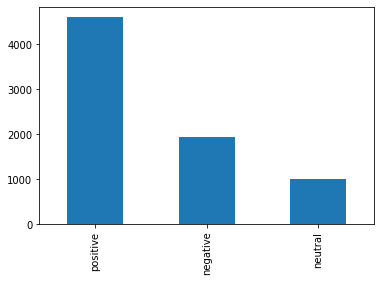

In [273]:
%matplotlib inline
dataset.sentiment.value_counts().plot(kind='bar')

In sum, the database is composed of 7558 tweets (rows) and 7 columns, namely: the date of the tweet, the user id, the tweet's text, the sentiment of the text, the number of replies to the tweet, the number of retweets the tweet received and the number of likes the tweet received.

Also, the data shows a higher number of positive sentiments toward the company (4611 tweets), followed by negative sentiments (1948 tweets), and finally neutral sentiments (999 tweets).

Next, I will plot whether engagement measures (i.e., likes, retweets and replies) vary across sentiments.

### Engagement evaluation

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

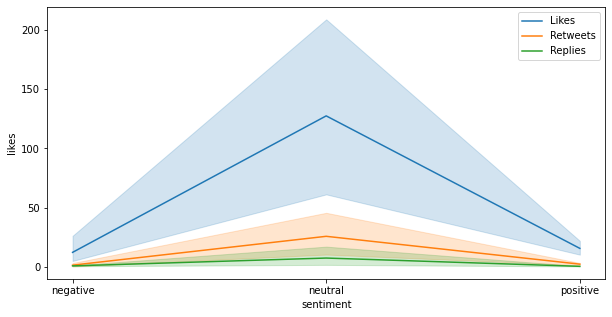

In [275]:
plt.figure(figsize=(10,5))
sns.lineplot(x='sentiment',y='likes',data=dataset,label='Likes')
sns.lineplot(x='sentiment',y='retweets',data=dataset,label='Retweets')
sns.lineplot(x='sentiment',y='replies',data=dataset, label='Replies')
plt.show()

The chart above shows a trend between sentiment and engagement measures. Generally, the highest levels of engagement on any of the measures (replies, likes or retweets) are for neutral sentiments, while negative and positive sentiments are similar at lower levels of interaction. This may happen precisely because "neutral" tweets were commonly classified as announcement tweets, that is, tweets that indicated casting, a new play, exhibition or a new product. In this case, users tend to engage more through likes, followed by retweets and finally replies.

This result is logical in view of the trade-off between signaling and the user's effort to engage with the tweet. Signaling that the user is engaged through a like is a low effort whereas replying to a tweet is a higher effort.

Next, I will explore how users' engagement and sentiments differ during a period of time.

In [276]:
import cufflinks as cf
cf.go_offline()

In [277]:
dataset.date = pd.to_datetime(dataset.date)

In [278]:
# If you remember, my "date" column indicates the exact day and time the tweet was published. Now I'm going to create a new column grouping the tweets by month.
dataset.date.dt.to_period('M')

0       2022-09
1       2022-09
2       2022-09
3       2022-09
4       2022-09
         ...   
7553    2019-01
7554    2019-01
7555    2019-01
7556    2019-01
7557    2019-01
Name: date, Length: 7558, dtype: period[M]

In [279]:
dataset['date_month'] = dataset.date.dt.to_period('M').astype(str)

In [280]:
dataset.date_month.head()

0    2022-09
1    2022-09
2    2022-09
3    2022-09
4    2022-09
Name: date_month, dtype: object

In [281]:
# To check if my "date_month" column was successfully included in my database, I will see my first 5 rows.
dataset.head()

,date,user_id,text,sentiment,replies,retweets,likes,date_month
0,2022-09-29 22:32:31+00:00,1.575615e+18,Celebrities Have HUGE MELTDOWN After WOKE Litt...,negative,0,0,1,2022-09
1,2022-09-29 16:30:41+00:00,1.575523e+18,"Hey @Disney, is it too late to add a scene to ...",neutral,0,0,3,2022-09
2,2022-09-29 13:39:33+00:00,1.575480e+18,@rachelzegler Who is doing the casting work at...,negative,0,0,0,2022-09
3,2022-09-29 13:11:28+00:00,1.575473e+18,My gf keeps bullying me because I thought Ursu...,neutral,4,0,1,2022-09
4,2022-09-29 10:53:55+00:00,1.575439e+18,Um @Disney why not make a movie about Gabriell...,neutral,0,0,0,2022-09


In [282]:
# Creating my "sentiment_month" object by grouping the numer of sentiments in each month
# This evaluation will tell me if there were more sentiments during a specific month compared to others
sentiment_month = dataset.groupby(by = 'date_month').sentiment.count()
sentiment_month.head()

date_month
2019-01     99
2019-02    153
2019-03    120
2019-04    125
2019-05    125
Name: sentiment, dtype: int64

In [283]:
sentiment_month.index

Index(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09'],
      dtype='object', name='date_month')

In [284]:
sentiment_month.values

array([  99,  153,  120,  125,  125,  353, 2647,  293,  111,  134,  307,
         95,   81,   52,   52,  109,   96,   58,   81,   62,   67,   38,
         66,   75,   58,   57,   55,   54,   65,   73,   63,   57,   47,
         45,   51,   26,   31,   51,   48,   72,   57,   90,   40,   49,
       1070])

In [285]:
import plotly
import plotly.graph_objs as go
import plotly.offline as py

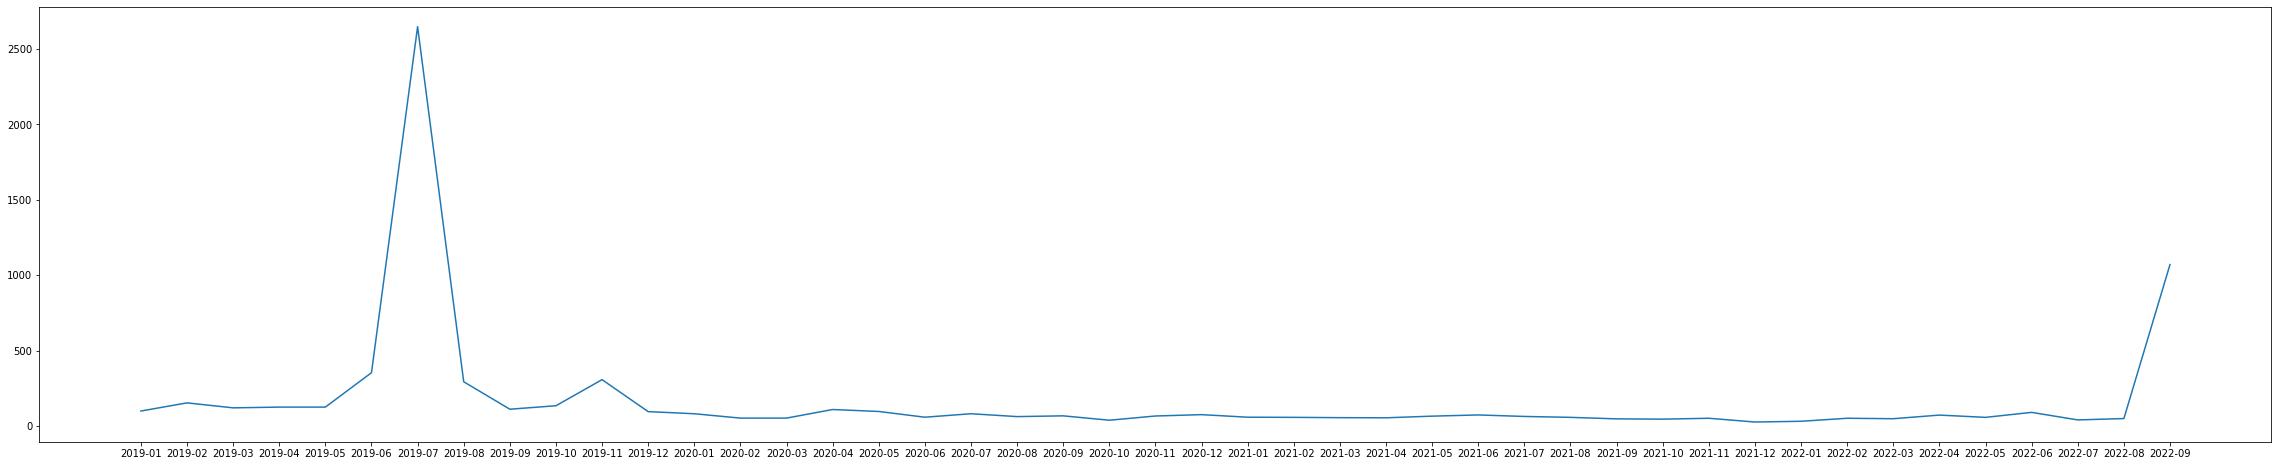

In [286]:
plt.figure(figsize=(40,8))
plt.plot(sentiment_month.index,sentiment_month.values)
plt.show()

As expected, the month regarding most sentiments from users (that is, most interaction on Twitter) was in July 2019, the exact period of time where Halle Bailey was announced as playing Ariel on the new Little Mermaid live-action.

Also important to notice, September 2022 was showing a tendency of growth if compared with other months. Unfortunately, I was not able to use all tweets from 2022 but this tendency in this particular month is probably due to the first movie teaser that was released on  September 9th of the current year.

Is expected that this tendency also follows our engagement measures, but now I will check and compare.

In [287]:
# Creating my "replies_month" object by grouping the numer of replies in each month
replies_month = dataset.groupby(by = 'date_month').replies.sum()
replies_month.head()

date_month
2019-01    206
2019-02    181
2019-03     43
2019-04     57
2019-05     66
Name: replies, dtype: int64

In [288]:
# Creating my "retweets_month" object by grouping the numer of retweets in each month
retweets_month = dataset.groupby(by = 'date_month').retweets.sum()
retweets_month.head()

date_month
2019-01    2335
2019-02    1001
2019-03     280
2019-04     217
2019-05     448
Name: retweets, dtype: int64

In [289]:
# Creating my "likes_month" object by grouping the numer of likes in each month
likes_month = dataset.groupby(by = 'date_month').likes.sum()
likes_month.head()

date_month
2019-01    10435
2019-02     4364
2019-03      852
2019-04     1339
2019-05     3206
Name: likes, dtype: int64

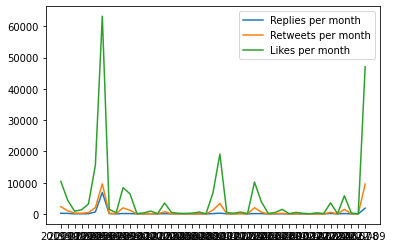

<Figure size 2880x576 with 0 Axes>

In [290]:
# Plotting the engagement measures per year
fig, varx = plt.subplots()
varx.plot(likes_month.index,replies_month,label='Replies per month')
varx.plot(likes_month.index,retweets_month,label='Retweets per month')
varx.plot(likes_month.index,likes_month,label='Likes per month')

plt.figure(figsize=(40,8))
varx.legend()
plt.show()

Maybe per month is not the best choice for visualization of our data. Let's take a look on engagement analysis per year.

In [291]:
# Grouping my "date" information per year
dataset.date.dt.to_period('Y')

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
7553    2019
7554    2019
7555    2019
7556    2019
7557    2019
Name: date, Length: 7558, dtype: period[A-DEC]

In [292]:
# Creating a "date_year" column on my dataset
dataset['date_year'] = dataset.date.dt.to_period('Y').astype(str)

In [293]:
dataset.date_year.head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: date_year, dtype: object

In [294]:
dataset.date_year.tail()

7553    2019
7554    2019
7555    2019
7556    2019
7557    2019
Name: date_year, dtype: object

In [295]:
dataset.head()

,date,user_id,text,sentiment,replies,retweets,likes,date_month,date_year
0,2022-09-29 22:32:31+00:00,1.575615e+18,Celebrities Have HUGE MELTDOWN After WOKE Litt...,negative,0,0,1,2022-09,2022
1,2022-09-29 16:30:41+00:00,1.575523e+18,"Hey @Disney, is it too late to add a scene to ...",neutral,0,0,3,2022-09,2022
2,2022-09-29 13:39:33+00:00,1.575480e+18,@rachelzegler Who is doing the casting work at...,negative,0,0,0,2022-09,2022
3,2022-09-29 13:11:28+00:00,1.575473e+18,My gf keeps bullying me because I thought Ursu...,neutral,4,0,1,2022-09,2022
4,2022-09-29 10:53:55+00:00,1.575439e+18,Um @Disney why not make a movie about Gabriell...,neutral,0,0,0,2022-09,2022


In [296]:
# Creating my "replies_year" object by grouping the numer of replies in each year
replies_year = dataset.groupby(by = 'date_year').replies.sum()
replies_year.head()

date_year
2019    8463
2020     744
2021     564
2022    2230
Name: replies, dtype: int64

In [297]:
# Creating my "likes_year" object by grouping the numer of likes in each year
likes_year = dataset.groupby(by = 'date_year').likes.sum()
likes_year.head()

date_year
2019    115763
2020     32514
2021     18277
2022     57352
Name: likes, dtype: int64

In [298]:
# Creating my "retweets_year" object by grouping the numer of retweets in each year
retweets_year = dataset.groupby(by = 'date_year').retweets.sum()
retweets_year.head()

date_year
2019    19416
2020     5685
2021     3146
2022    11676
Name: retweets, dtype: int64

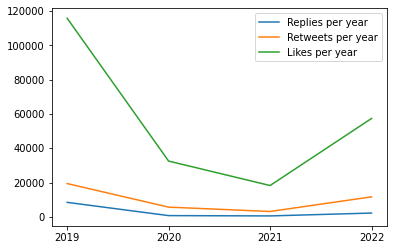

<Figure size 1440x720 with 0 Axes>

In [299]:
# Plotting the engagement measures per year
fig, varx = plt.subplots()
varx.plot(likes_year.index,replies_year,label='Replies per year')
varx.plot(likes_year.index,retweets_year,label='Retweets per year')
varx.plot(likes_year.index,likes_year,label='Likes per year')


plt.figure(figsize=(20,10))
varx.legend()
plt.show()

Although the evaluation per month gives us more variability of the data, analysis per year is more interpretable. Both of them show the same tendency: the levels of engagement are way higher during controversial times. That is, replies, retweets, and likes were higher in 2019 (when the casting for Little Mermaid was released) than in other years. Interesting to note as well: 2022 (when Disney released the first teaser) also shows a tendency of higher levels of engagement on the 3 dimensions.

Now let's take a quick glimpse into how users' sentiments vary over the years.

In [300]:
sentiment_year = dataset.groupby(by = 'date_year').sentiment.value_counts()

In [301]:
sentiment_year.value_counts

<bound method IndexOpsMixin.value_counts of date_year  sentiment
2019       positive     2868
           negative     1194
           neutral       500
2020       positive      465
           negative      199
           neutral       173
2021       positive      397
           neutral       149
           negative      105
2022       positive      881
           negative      450
           neutral       177
Name: sentiment, dtype: int64>

The years with the most negative feelings were 2019, 2022, 2020, and 2021, respectively. Once again, higher levels of negative feelings were due to events related to casting and the teaser release. However, positive sentiments were higher in all cases.

## Supervised Learning for Sentiment Analysis

### Preprocessing

The EDA indicates that, although business newspapers usually portray a [disproportionate backlash](https://www.forbes.com/sites/danidiplacido/2022/09/14/disneys-little-mermaid-backlash-has-reached-insane-heights/?sh=1ce9ae415592) against Disney for casting a black woman to be Ariel, positive feelings outweigh negative feelings.

However, data from social networks (such as Twitter) needs a text treatment for ML prediction and further analysis. This section will be dedicated to that. 

The data will be preprocessed as it follows:

1. Drop unused columns
2. Transform the "sentiment" variable from categorical to numerical
3. HTML tag removal.
4. Removal of numbers and mentions.
5. Tokenization.
6. Lower case convertion.
7. Removal of Special Characters and Punctuations.
8. Removal of stopwords
9. Lemmatize.
10. Join the words in the list to convert back to text string in the data frame.

#### Dropping unused columns

In [302]:
# Dropping all columns except for sentiment and text (engagement measures will no longer be used)
dataset.drop(['date','user_id','replies', 'retweets', 'likes','date_month','date_year'],inplace=True, axis=1)

In [303]:
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,negative
1,"Hey @Disney, is it too late to add a scene to ...",neutral
2,@rachelzegler Who is doing the casting work at...,negative
3,My gf keeps bullying me because I thought Ursu...,neutral
4,Um @Disney why not make a movie about Gabriell...,neutral


#### Transforming categorical variable to numerical

In [304]:
# Transforming "sentiment" in a numerical variable
from nltk.classify.scikitlearn import LabelEncoder
from sklearn import preprocessing
for variaveis in ['sentiment']:
  dataset[variaveis] = LabelEncoder().fit_transform(dataset[variaveis])

dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey @Disney, is it too late to add a scene to ...",1
2,@rachelzegler Who is doing the casting work at...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um @Disney why not make a movie about Gabriell...,1


In [305]:
# The Label Encoder function transformed negative sentiments to 0, neutral sentiments to 1, and positive sentiments to 2.
dataset.sentiment.value_counts()

2    4611
0    1948
1     999
Name: sentiment, dtype: int64

#### HTML Removal

In [306]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()


dataset['text'] = dataset['text'].apply(lambda x: strip_html(x))

In [307]:
# I will also remove URLs (if any)
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: remove_url(x))
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey @Disney, is it too late to add a scene to ...",1
2,@rachelzegler Who is doing the casting work at...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um @Disney why not make a movie about Gabriell...,1


No HTML tags or URLs were present in the 5 first rows so no change is seen here.

#### Removal of numbers and mentions

In [308]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

dataset['text'] = dataset['text'].apply(lambda x: remove_numbers(x))

In [309]:
# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: remove_mention(x))
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey , is it too late to add a scene to the new...",1
2,Who is doing the casting work at ? She/He nee...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um why not make a movie about Gabriella inste...,1


#### Tokenization

Tokenization breaks the raw text into words. A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing.

In [310]:
# First I will remove contractions
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [311]:
def cont_to_exp(x):
    for key in contractions:
        value=contractions[key]
        x=x.replace(key,value)
    return x


dataset['text'] = dataset['text'].apply(lambda x: cont_to_exp(x))
dataset.head()

,text,sentiment
0,Celebrities Have HUGE MELTDOWN After WOKE Litt...,0
1,"Hey , is it too late to add a scene to the new...",1
2,Who is doing the casting work at ? She/He nee...,0
3,My gf keeps bullying me because I thought Ursu...,1
4,Um why not make a movie about Gabriella inste...,1


In [312]:
#for tokenize

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import unicodedata
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [313]:
dataset['text'] = dataset.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
dataset.head()

,text,sentiment
0,"[Celebrities, Have, HUGE, MELTDOWN, After, WOK...",0
1,"[Hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[Who, is, doing, the, casting, work, at, ?, Sh...",0
3,"[My, gf, keeps, bullying, me, because, I, thou...",1
4,"[Um, why, not, make, a, movie, about, Gabriell...",1


In [314]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
dataset['text']=dataset['text'].apply(lambda x: remove_non_ascii(x))
dataset.head()

,text,sentiment
0,"[Celebrities, Have, HUGE, MELTDOWN, After, WOK...",0
1,"[Hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[Who, is, doing, the, casting, work, at, ?, Sh...",0
3,"[My, gf, keeps, bullying, me, because, I, thou...",1
4,"[Um, why, not, make, a, movie, about, Gabriell...",1


#### Lower case convertion

In [315]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
dataset['text']=dataset['text'].apply(lambda x: to_lowercase(x))
dataset.head()

,text,sentiment
0,"[celebrities, have, huge, meltdown, after, wok...",0
1,"[hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[who, is, doing, the, casting, work, at, ?, sh...",0
3,"[my, gf, keeps, bullying, me, because, i, thou...",1
4,"[um, why, not, make, a, movie, about, gabriell...",1


#### Hashtags Removal

In [316]:
def remove_hash(words):
    """Remove hashtags from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'#\w+','',word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

dataset['text']=dataset['text'].apply(lambda x: remove_hash(x))
dataset.head()

,text,sentiment
0,"[celebrities, have, huge, meltdown, after, wok...",0
1,"[hey, ,, is, it, too, late, to, add, a, scene,...",1
2,"[who, is, doing, the, casting, work, at, ?, sh...",0
3,"[my, gf, keeps, bullying, me, because, i, thou...",1
4,"[um, why, not, make, a, movie, about, gabriell...",1


#### Punctuation Removal

In [317]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

dataset['text']=dataset['text'].apply(lambda x: remove_punctuation(x))
dataset.head()

,text,sentiment
0,"[celebrities, have, huge, meltdown, after, wok...",0
1,"[hey, is, it, too, late, to, add, a, scene, to...",1
2,"[who, is, doing, the, casting, work, at, shehe...",0
3,"[my, gf, keeps, bullying, me, because, i, thou...",1
4,"[um, why, not, make, a, movie, about, gabriell...",1


#### Stopwords Removal

In [318]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 


# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

dataset['text']=dataset['text'].apply(lambda x: remove_stopwords(x))
dataset.head()

,text,sentiment
0,"[celebrities, huge, meltdown, woke, little, me...",0
1,"[hey, late, add, scene, new, little, mermaid, ...",1
2,"[casting, work, shehe, needs, fired, doesnt, l...",0
3,"[gf, keeps, bullying, thought, ursula, little,...",1
4,"[um, make, movie, gabriella, instead, ariel, o...",1


#### Lemmatize

In this step, lemmatization will group different inflected forms of words into the root form, maintaining the same meaning.

In [319]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [320]:
lemmatizer = WordNetLemmatizer()
# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

dataset['text']=dataset['text'].apply(lambda x: lemmatize_list(x))
dataset.head()

,text,sentiment
0,"[celebrities, huge, meltdown, wake, little, me...",0
1,"[hey, late, add, scene, new, little, mermaid, ...",1
2,"[cast, work, shehe, need, fire, doesnt, look, ...",0
3,"[gf, keep, bully, think, ursula, little, merma...",1
4,"[um, make, movie, gabriella, instead, ariel, o...",1


Now I will normalize the text and take one last look at the first 5 rows.


In [321]:
def normalize(words):
    return ' '.join(words) #take the words out of the list and use space as a delimiter
dataset['text']=dataset['text'].apply(lambda x: normalize(x))
dataset.head()

,text,sentiment
0,celebrities huge meltdown wake little mermaid ...,0
1,hey late add scene new little mermaid ariel pl...,1
2,cast work shehe need fire doesnt look like lit...,0
3,gf keep bully think ursula little mermaid hot ...,1
4,um make movie gabriella instead ariel official...,1


### Bag of Words

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [322]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [323]:
# Vectorization (Convert text data to numbers).


Count_vec = CountVectorizer(max_features=1000)        # Keep only 1000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(dataset['text'])

data_features = data_features.toarray()                # Convert the data features to array.

In [324]:
data_features.shape

(7558, 1000)

### Splitting into training and testing set

In [325]:
X = data_features

y = dataset['sentiment']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
print("Size of x_train:", (X_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (X_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (6046, 1000)
Size of y_train: (6046,)
Size of x_test: (1512, 1000)
Size of y_test: (1512,)


### Addressing the imbalance issue

The plot below indicates that we have pretty imbalanced data, where one of the categories represents more than half of the data.

For ML algorithms, imbalanced data can be a problem. For this reason, I will run my code using my original dataset (after preprocessing; that is, imbalanced), with random oversampling, and with random undersampling.

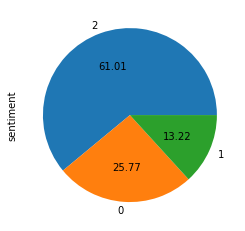

In [328]:
%matplotlib inline
dataset.sentiment.value_counts().plot.pie(autopct='%.2f')

In [329]:
!pip install imbalanced-learn

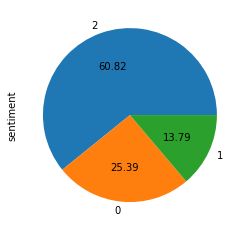

In [330]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [331]:
y_train.value_counts()

2    3677
0    1535
1     834
Name: sentiment, dtype: int64

#### Class Balancing: Random Oversampling

In [332]:
from imblearn.over_sampling import RandomOverSampler

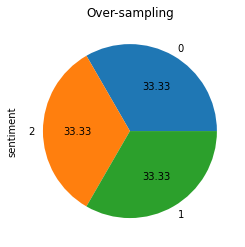

In [333]:
# Creating an object for random oversampling and splitting into training and testing set
ros = RandomOverSampler(sampling_strategy="not majority")
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [334]:
#Now all my classes are oversampled (ros)
y_train_ros.value_counts()

0    3677
2    3677
1    3677
Name: sentiment, dtype: int64

#### Class Balancing: Random Undersampling

In [335]:
from imblearn.under_sampling import RandomUnderSampler

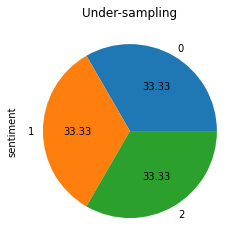

In [336]:
# Creating an object for random undersampling and splitting into training and testing set
rus = RandomUnderSampler(sampling_strategy="not minority")
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [337]:
# #Now all my classes are undersampled (rus)
y_train_rus.value_counts()

0    834
1    834
2    834
Name: sentiment, dtype: int64

### Classification without balanced class

#### Logistic Regression

In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [339]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [340]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.6937830687830688


In [341]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[190  17 206]
 [  9  67  89]
 [ 95  47 792]]


              precision    recall  f1-score   support

           0       0.65      0.46      0.54       413
           1       0.51      0.41      0.45       165
           2       0.73      0.85      0.78       934

    accuracy                           0.69      1512
   macro avg       0.63      0.57      0.59      1512
weighted avg       0.68      0.69      0.68      1512



#### Naive Bayes

In [342]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [343]:
nbm,nbg,nbb = MultinomialNB(alpha=1.0,fit_prior=True), GaussianNB(), BernoulliNB(alpha=1.0,fit_prior=True)
nbm.fit(X_train, y_train)
nbg.fit(X_train, y_train)
nbb.fit(X_train, y_train)

BernoulliNB()

In [344]:
ypm = nbm.predict(X_test)
ypg = nbg.predict(X_test)
ypb = nbb.predict(X_test)

In [345]:
print("Multinomial:", accuracy_score(y_test, ypm))
print("Gaussian:", accuracy_score(y_test, ypg))
print("Bernoulli:", accuracy_score(y_test, ypb))

Multinomial: 0.6646825396825397
Gaussian: 0.31283068783068785
Bernoulli: 0.6587301587301587


In [346]:
print(confusion_matrix(y_test,ypm))
print("\n")
print(classification_report(y_test,ypm))

[[205  27 181]
 [  8  79  78]
 [138  75 721]]


              precision    recall  f1-score   support

           0       0.58      0.50      0.54       413
           1       0.44      0.48      0.46       165
           2       0.74      0.77      0.75       934

    accuracy                           0.66      1512
   macro avg       0.59      0.58      0.58      1512
weighted avg       0.66      0.66      0.66      1512



#### K-Neighbors Classifier

In [347]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [348]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train, y_train)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

In [349]:
print("KNN:", accuracy_score(y_test, pred_knn))

print(confusion_matrix(y_test, pred_knn))

KNN: 0.45701058201058203
[[ 78 141 194]
 [  4 108  53]
 [ 80 349 505]]


In [350]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.48      0.19      0.27       413
           1       0.18      0.65      0.28       165
           2       0.67      0.54      0.60       934

    accuracy                           0.46      1512
   macro avg       0.44      0.46      0.38      1512
weighted avg       0.57      0.46      0.48      1512



#### Support Vector Machine (SVM)

In [351]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train, y_train)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

In [352]:
print("SVM:", accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_knn))

SVM: 0.6884920634920635
[[ 78 141 194]
 [  4 108  53]
 [ 80 349 505]]


In [353]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.29      0.42       413
           1       0.85      0.21      0.33       165
           2       0.68      0.95      0.79       934

    accuracy                           0.69      1512
   macro avg       0.75      0.48      0.51      1512
weighted avg       0.71      0.69      0.64      1512



#### K-fold cross-validation

Using k-fold cross-validation to determine an optimal number of base learners in a random forest classifier model that will recieve the count vectorizer matrix as input.

In [354]:
# Finding optimal number of base learners
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [355]:
# K-Fold Cross-validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

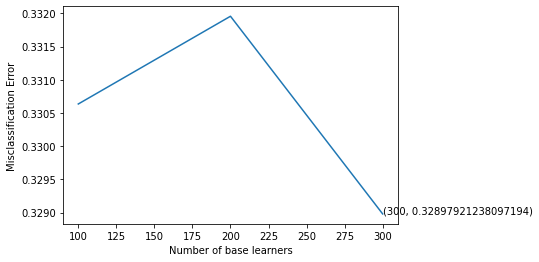

In [356]:
# Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Apparently, for CountVectorizer, the error was at a minimum when there were 300 base learners in the random forest.

#### Random Forest

In [357]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [358]:
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' ,'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.64      0.37      0.46       413
     neutral       0.50      0.47      0.48       165
    positive       0.72      0.86      0.78       934

    accuracy                           0.68      1512
   macro avg       0.62      0.56      0.58      1512
weighted avg       0.67      0.68      0.66      1512

Accuracy of the model is :  0.6805555555555556


### Classification with oversampled balanced class

#### Logistic Regression

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [360]:
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

LogisticRegression()

In [361]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.6051587301587301


In [362]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[233  57 123]
 [ 12 123  30]
 [180 195 559]]


              precision    recall  f1-score   support

           0       0.55      0.56      0.56       413
           1       0.33      0.75      0.46       165
           2       0.79      0.60      0.68       934

    accuracy                           0.61      1512
   macro avg       0.55      0.64      0.56      1512
weighted avg       0.67      0.61      0.62      1512



#### Naive Bayes

In [363]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [364]:
nbm,nbg,nbb = MultinomialNB(alpha=1.0,fit_prior=True), GaussianNB(), BernoulliNB(alpha=1.0,fit_prior=True)
nbm.fit(X_train_ros, y_train_ros)
nbg.fit(X_train_ros, y_train_ros)
nbb.fit(X_train_ros, y_train_ros)

BernoulliNB()

In [365]:
ypm = nbm.predict(X_test)
ypg = nbg.predict(X_test)
ypb = nbb.predict(X_test)

In [366]:
print("Multinomial:", accuracy_score(y_test, ypm))
print("Gaussian:", accuracy_score(y_test, ypg))
print("Bernoulli:", accuracy_score(y_test, ypb))

Multinomial: 0.6157407407407407
Gaussian: 0.3115079365079365
Bernoulli: 0.5859788359788359


In [367]:
print(confusion_matrix(y_test,ypm))
print("\n")
print(classification_report(y_test,ypm))

[[254  43 116]
 [ 13 117  35]
 [209 165 560]]


              precision    recall  f1-score   support

           0       0.53      0.62      0.57       413
           1       0.36      0.71      0.48       165
           2       0.79      0.60      0.68       934

    accuracy                           0.62      1512
   macro avg       0.56      0.64      0.58      1512
weighted avg       0.67      0.62      0.63      1512



#### K-Neighbors Classifier

In [368]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [369]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train_ros, y_train_ros)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

In [370]:
print("KNN:", accuracy_score(y_test, pred_knn))

print(confusion_matrix(y_test, pred_knn))

KNN: 0.330026455026455
[[129 205  79]
 [ 11 136  18]
 [162 538 234]]


In [371]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.31      0.36       413
           1       0.15      0.82      0.26       165
           2       0.71      0.25      0.37       934

    accuracy                           0.33      1512
   macro avg       0.43      0.46      0.33      1512
weighted avg       0.57      0.33      0.36      1512



#### Support Vector Machine (SVM)

In [372]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train_ros, y_train_ros)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

In [373]:
print("SVM:", accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_knn))

SVM: 0.6408730158730159
[[129 205  79]
 [ 11 136  18]
 [162 538 234]]


In [374]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52       413
           1       0.37      0.66      0.47       165
           2       0.75      0.71      0.73       934

    accuracy                           0.64      1512
   macro avg       0.57      0.61      0.58      1512
weighted avg       0.66      0.64      0.65      1512



#### K-fold cross-validation

Using k-fold cross-validation to determine an optimal number of base learners in a random forest classifier model that will recieve the count vectorizer matrix as input.

In [375]:
# Finding optimal number of base learners
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [376]:
# K-Fold Cross-validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_ros, y_train_ros, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

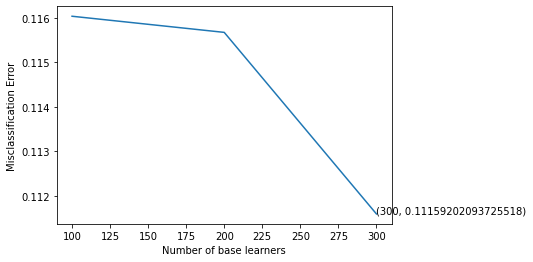

In [377]:
# Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Apparently, for CountVectorizer, the error was at a minimum when there were 300 base learners in the random forest.

#### Random Forest

In [378]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(n_estimators=300)

In [379]:
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative', 'neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.56      0.41      0.47       413
     neutral       0.39      0.55      0.46       165
    positive       0.72      0.76      0.74       934

    accuracy                           0.64      1512
   macro avg       0.56      0.57      0.56      1512
weighted avg       0.64      0.64      0.64      1512

Accuracy of the model is :  0.6415343915343915


### Classification with undersampled balanced class

#### Logistic Regression

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [381]:
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [382]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.542989417989418


In [383]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[242  72  99]
 [ 16 127  22]
 [246 236 452]]


              precision    recall  f1-score   support

           0       0.48      0.59      0.53       413
           1       0.29      0.77      0.42       165
           2       0.79      0.48      0.60       934

    accuracy                           0.54      1512
   macro avg       0.52      0.61      0.52      1512
weighted avg       0.65      0.54      0.56      1512



#### Naive Bayes

In [384]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [385]:
nbm,nbg,nbb = MultinomialNB(alpha=1.0,fit_prior=True), GaussianNB(), BernoulliNB(alpha=1.0,fit_prior=True)
nbm.fit(X_train_rus, y_train_rus)
nbg.fit(X_train_rus, y_train_rus)
nbb.fit(X_train_rus, y_train_rus)

BernoulliNB()

In [386]:
ypm = nbm.predict(X_test)
ypg = nbg.predict(X_test)
ypb = nbb.predict(X_test)

In [387]:
print("Multinomial:", accuracy_score(y_test, ypm))
print("Gaussian:", accuracy_score(y_test, ypg))
print("Bernoulli:", accuracy_score(y_test, ypb))

Multinomial: 0.5734126984126984
Gaussian: 0.35119047619047616
Bernoulli: 0.5396825396825397


In [388]:
print(confusion_matrix(y_test,ypm))
print("\n")
print(classification_report(y_test,ypm))

[[270  56  87]
 [ 21 118  26]
 [259 196 479]]


              precision    recall  f1-score   support

           0       0.49      0.65      0.56       413
           1       0.32      0.72      0.44       165
           2       0.81      0.51      0.63       934

    accuracy                           0.57      1512
   macro avg       0.54      0.63      0.54      1512
weighted avg       0.67      0.57      0.59      1512



#### K-Neighbors Classifier

In [389]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [390]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train_rus, y_train_rus)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

In [391]:
print("KNN:", accuracy_score(y_test, pred_knn))

print(confusion_matrix(y_test, pred_knn))

KNN: 0.22420634920634921
[[ 80 299  34]
 [  9 151   5]
 [ 97 729 108]]


In [392]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.19      0.27       413
           1       0.13      0.92      0.22       165
           2       0.73      0.12      0.20       934

    accuracy                           0.22      1512
   macro avg       0.43      0.41      0.23      1512
weighted avg       0.59      0.22      0.22      1512



#### Support Vector Machine (SVM)

In [393]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train_rus, y_train_rus)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

In [394]:
print("SVM:", accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_knn))

SVM: 0.5304232804232805
[[ 80 299  34]
 [  9 151   5]
 [ 97 729 108]]


In [395]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53       413
           1       0.28      0.79      0.42       165
           2       0.81      0.45      0.58       934

    accuracy                           0.53      1512
   macro avg       0.52      0.61      0.51      1512
weighted avg       0.66      0.53      0.55      1512



#### K-fold cross-validation

Using k-fold cross-validation to determine an optimal number of base learners in a random forest classifier model that will recieve the count vectorizer matrix as input.

In [396]:
# Finding optimal number of base learners
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [397]:
# K-Fold Cross-validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_rus, y_train_rus, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

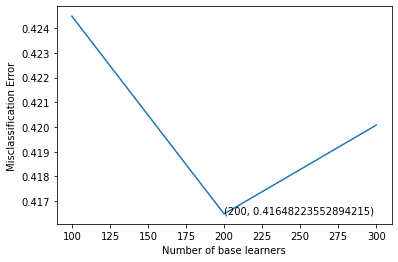

In [398]:
# Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Apparently, for CountVectorizer, the error was at a minimum when there were 300 base learners in the random forest.

#### Random Forest

In [399]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_rus, y_train_rus)

RandomForestClassifier(n_estimators=200)

In [400]:
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative', 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.44      0.54      0.48       413
     neutral       0.28      0.75      0.41       165
    positive       0.76      0.46      0.57       934

    accuracy                           0.51      1512
   macro avg       0.49      0.58      0.49      1512
weighted avg       0.62      0.51      0.53      1512

Accuracy of the model is :  0.5125661375661376


### Another approach for evaluation

#### Model Building with oversampled balanced class

In [401]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.988359
1,MCC_CV,0.835391
2,MCC_test,0.310400


#### Model Building with undersampled balanced class

In [402]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_rus, y_train_rus, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_rus)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.988641
1,MCC_CV,0.379960
2,MCC_test,0.270006


#### Model Building without balanced class

In [403]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df1 = pd.concat([df_labels, df_values], axis=1)
df1

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.982840
1,MCC_CV,0.350691
2,MCC_test,0.350329


#### Model Building with class weight balancing

In [404]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df4 = pd.concat([df_labels, df_values], axis=1)
df4

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.982086
1,MCC_CV,0.307222
2,MCC_test,0.320734


In [405]:
df = pd.concat([df1.Performance_metric_values,
                df2.Performance_metric_values,
                df3.Performance_metric_values,
                df4.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)', 'Class balancing (class weights)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df

,Training,CV,Test
No class balancing,0.982840,0.350691,0.350329
Class balancing (undersampling),0.988641,0.379960,0.270006
Class balancing (oversampling),0.988359,0.835391,0.310400
Class balancing (class weights),0.982086,0.307222,0.320734


#### Polar plots

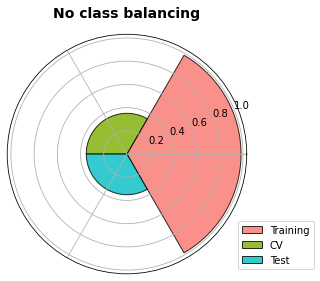

In [406]:
# No class balancing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

data = df.iloc[0,:]

N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data
width = 2 * np.pi / N

ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)
ax.xaxis.set_ticks(theta)

#ax.set_xticklabels(radii.index, fontsize=14)
ax.set_xticklabels(['','',''])
ax.tick_params(axis='x', which='major')

cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

for r, bar in zip(theta, bars):
    #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
    bar.set_facecolor(cmap(r / np.pi / 2))
    bar.set_alpha(0.8)
    bar.set_edgecolor('black')

ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

ax.set_title('No class balancing', fontsize=14, fontweight='bold', pad=5) # Training set

plt.tight_layout()
plt.savefig('Figure_polarplot_MCC_df1.pdf')

In [407]:
# Custom function for making polar plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def make_polar_plot(data, plotlabel):
  N = len(data)
  theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
  radii = data
  width = 2 * np.pi / N

  ax = plt.subplot(111, polar=True)

  bars = ax.bar(theta, radii, width=width, bottom=0.0)
  ax.xaxis.set_ticks(theta)

  #ax.set_xticklabels(radii.index, fontsize=14)
  ax.set_xticklabels(['','',''])
  ax.tick_params(axis='x', which='major')

  cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

  for r, bar in zip(theta, bars):
      #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
      bar.set_facecolor(cmap(r / np.pi / 2))
      bar.set_alpha(0.7)
      bar.set_edgecolor('black')

  ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

  ax.set_title(plotlabel, fontsize=14, fontweight='bold', pad=5) # Training set

  txt = plotlabel.split()
  txt2 = [x.capitalize() for x in txt]
  txt3 = ''.join(txt2)

  plt.tight_layout()
  plt.savefig(f'Figure_polarplot_MCC_{txt3}.pdf')

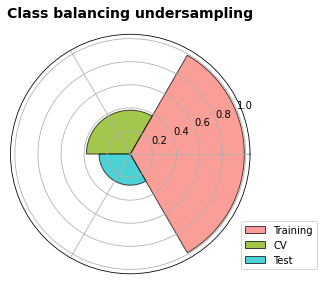

In [408]:
# Class balancing (undersampling)
data = df.iloc[1,:]

make_polar_plot(data, 'Class balancing undersampling')

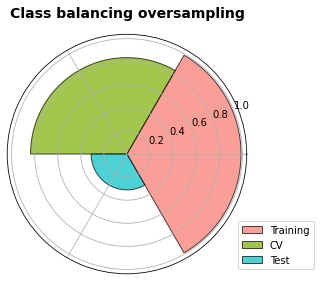

In [409]:
# Class balancing (oversampling)
data = df.iloc[2,:]

make_polar_plot(data, 'Class balancing oversampling')

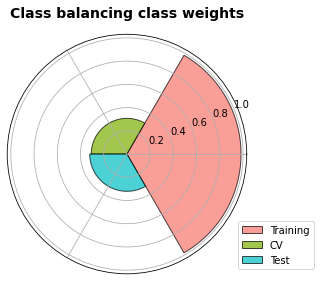

In [410]:
# Class balancing (class weights)
data = df.iloc[3,:]

make_polar_plot(data, 'Class balancing class weights')

## Concluding Remarks

We can conclude from this work that users tend to be more active during controversial periods. In particular, during a positioning moment on the part of Disney, Twitter users demonstrated significantly greater behavior during the years of controversial events. More specifically, the network showed greater movement in the years 2019 and 2022, years that are major milestones of such events: casting announcement (in 2019) and launch of the first teaser (2022).
Although much is said about the criticisms of those dissatisfied with the casting choice, this work demonstrates that, although the negative feelings are greater during these periods, the positive feelings still overcome them.

Equally interesting, engagement levels during these times are also significantly higher. This can be an interesting finding for companies that seek to position themselves but are afraid of the public's reaction. In fact, Disney is a company that is highly known and admired by many. Future studies need to explore to what extent the effect of brand love can influence the number of positive feelings during controversial times.

As for classification algorithms, the results were not as significant. In summary, this work adopted three analysis strategies: no balanced classes, oversample balanced classes, and undersample balanced classes. The table below demonstrates that, for the strategy without balanced classes, the best algorithms were Logistic Regression (69%) and SVM (69%).

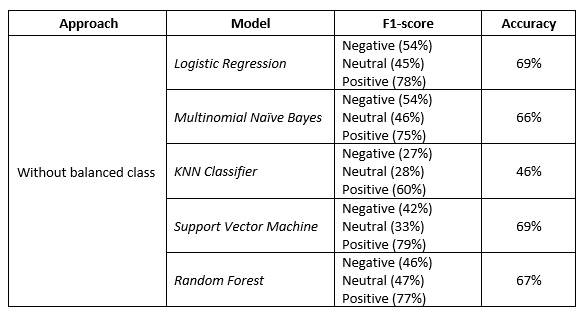

As for the oversampling strategy, the algorithm that best responded to the classification problem was Random Forest, with 65% accuracy.

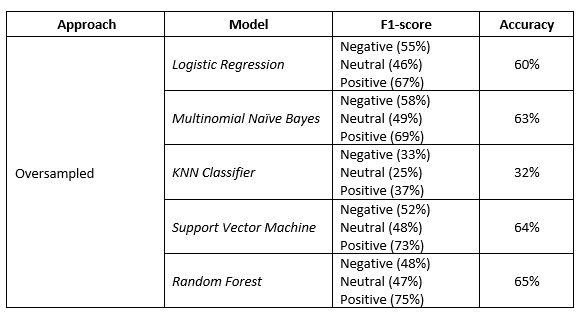

Finally, for the undersampling strategy (the least efficient), the algorithm was also the Logistic Regression, with 59% accuracy.

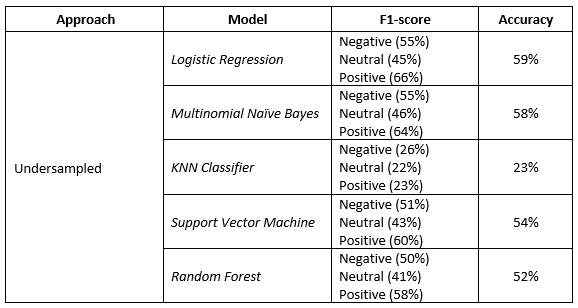

The MVV strategy for modeling also did not show encouraging results, with the non-balancing strategy being the best among the others in the test base (0.35). In the cross-validated base, the best response occurred in oversampling (0.83).

With these results we can conclude that the database for CSA problems is not easy to classify. All algorithms had a better interpretation of positive sentiments compared to the others. Therefore, more data and less classes may be needed for a better classification.

In this sense, my experiment 2 runs the same analyzes for a more polarized basis, that is, using only positive or negative feelings. Because neutral sentiments were generally about disclosing information about the company, considering them as positive is not so far from reality.

In [411]:
# Continues in [exp2]ML_Nathalia.ipynb]